# Project: House Price Prediction
### Author: Rahul Veggilam
### Description: This project utilizes EDA and Random Forest to predict house prices based on various features from the housing dataset.


In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the Housing Dataset


In [2]:
df = pd.read_csv('/content/kc_house_data_NaN.csv')
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0   

In [3]:
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
       Unnamed: 0          id             date     price  bedrooms  bathrooms  \
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
21608         1530      1131     3.0           0  ...      8        1530   
21609         2310      5813     2.0           0  ...      8        2310   
21610         1020      1350     2.0           0  ...      7        1020   
21611         1600      2388     2.0           0  ...      8        1600   
21612         1020      1076     2.0           0  ...      7        1020   

       sqft_basement  yr_bu

## Step 2: Data Summary


In [4]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int

In [5]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      

## Step 3: Data Cleaning


In [6]:
# Dropping the 'id' 'Unnamed' column as it is not useful for prediction.
df.drop("id", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# Converting the 'date' column from string format to datetime format to facilitate date-related analysis.
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


In [8]:
# Filling NaN values in 'bedrooms' column with the mean of the column
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

# Filling NaN values in 'bathrooms' column with the mean of the column
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

In [9]:
# Converting the 'date' column from string format to datetime format to facilitate date-related analysis.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## Step 4: Exploratory Data Analysis (EDA)

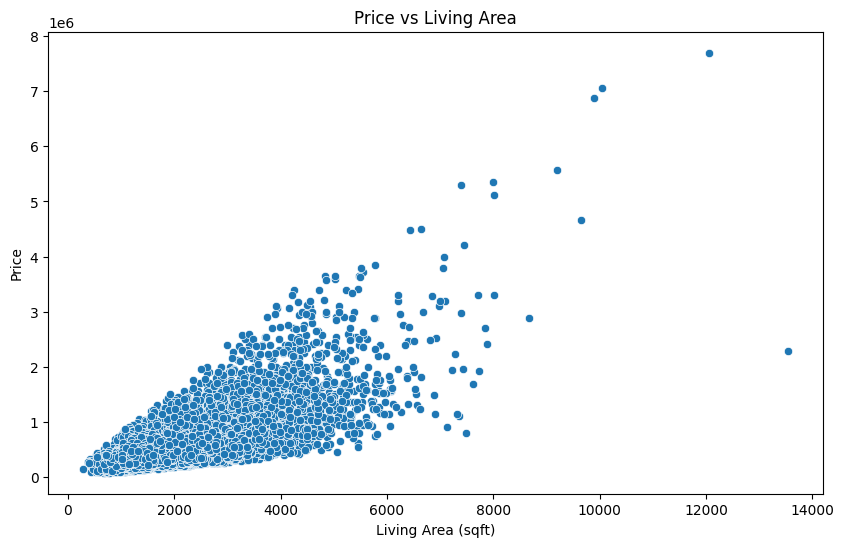

In [10]:
# Scatter plot for 'price' vs 'sqft_living'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.show()

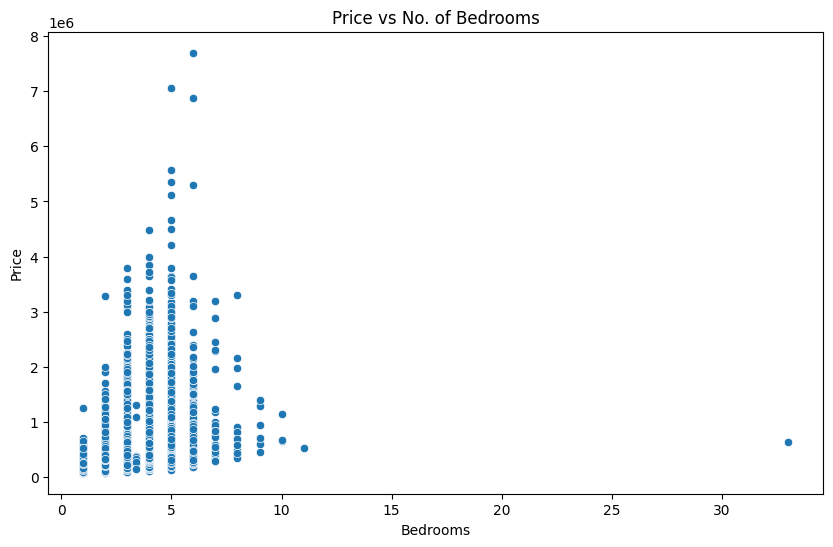

In [11]:
# Scatter plot for 'price' vs 'bedrooms'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs No. of Bedrooms')
plt.show()

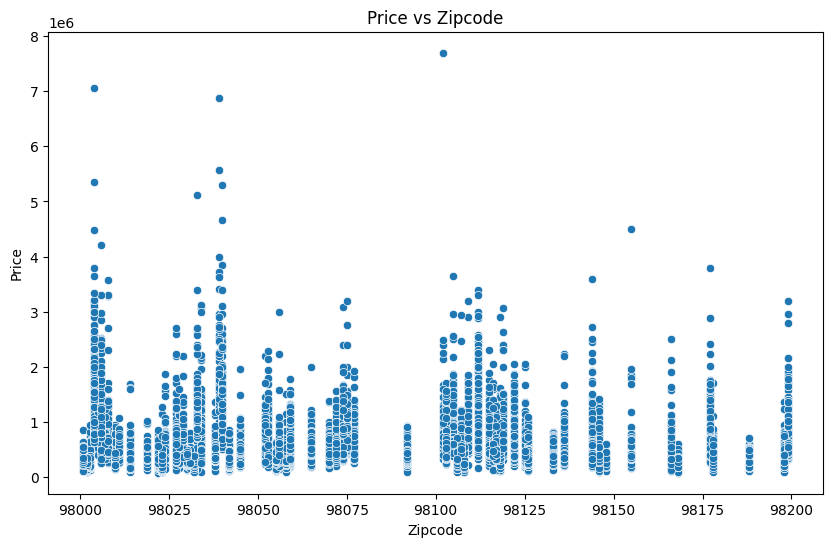

In [12]:
# Scatter plot for 'price' vs 'zipcode'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zipcode', y='price', data=df)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Price vs Zipcode')
plt.show()

## Step 5: Correlation Analysis


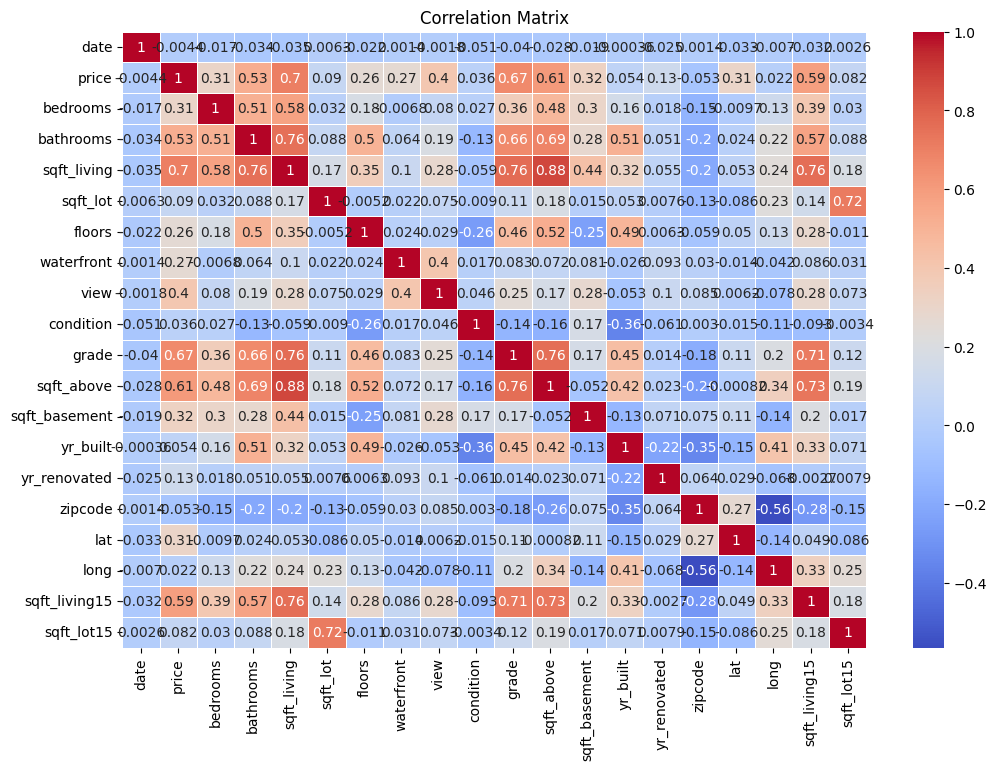

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 6: Feature Selection


In [14]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
            'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [15]:
X = df[features]  # Features
y = df['price']   # Target variable (house price)

## Step 7: Train/Test Split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 8: Model Creation and Training


In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Step 9: Predictions and Evaluation


In [18]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 21351347796.29941
R² Score: 0.8587656294573833


In [21]:
price_range = df['price'].describe()
print(price_range)

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


## Step 10: Cross-Validation


In [19]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validated R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')

Cross-Validated R² Scores: [0.87749754 0.88390786 0.87330495 0.86595846 0.87329809]
Mean R² Score: 0.874793378967345


## Step 11: Visualizing Predictions


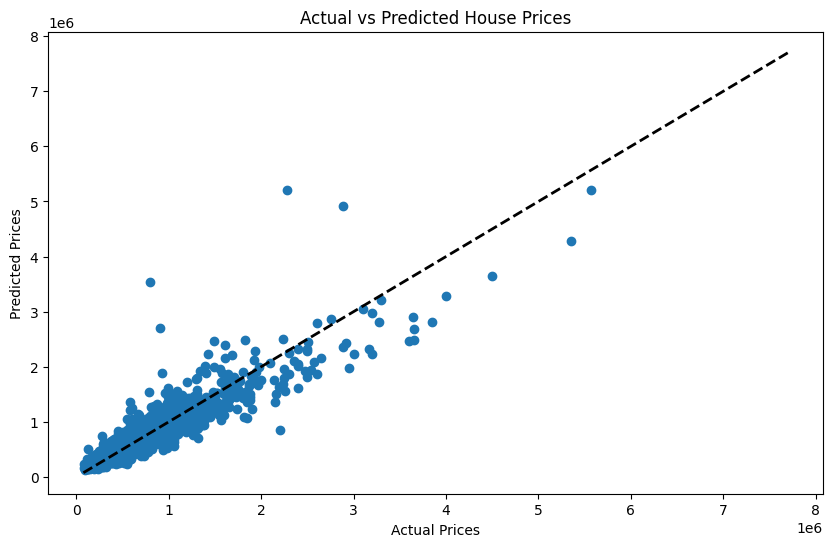

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect prediction
plt.show()

The Random Forest model achieved an R² score of 0.86, indicating that it effectively explained 86% of the variance in house prices based on the selected features.